# Filtro passa-alta Butterworth

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftfreq, fftshift

In [2]:
def generate_frequencies(num_rows, num_cols):
    '''Gera frequências do sinal tal que a frequência zero
       esteja no centro dos arrays'''

    freq_r = fftfreq(num_rows)
    freq_c = fftfreq(num_cols)
    freq_r = fftshift(freq_r)
    freq_c = fftshift(freq_c)  

    return freq_r, freq_c

def filtro_passa_alta_butterworth(img, d0, n):
    '''Cria um filtro passa-alta Butterworth de mesma dimensão que img. d0 e n são 
    utilizados para definir a mínima frequência que será mantida na imagem'''
    
    num_rows, num_cols = img.shape   
    freq_r, freq_c = generate_frequencies(num_rows, num_cols)
    
    high_pass_butterworth = np.zeros([num_rows, num_cols])
    
    for row in range(num_rows):
        for col in range(num_cols):
            dist = np.sqrt(freq_r[row]**2 + freq_c[col]**2)
            if dist == 0:
                dist = 1
            H = 1/(1+(d0/dist)**(2*n))
            
            high_pass_butterworth[row,col] = H
    
    return high_pass_butterworth

Text(0.5, 1.0, 'Imagem no domínio da frequência')

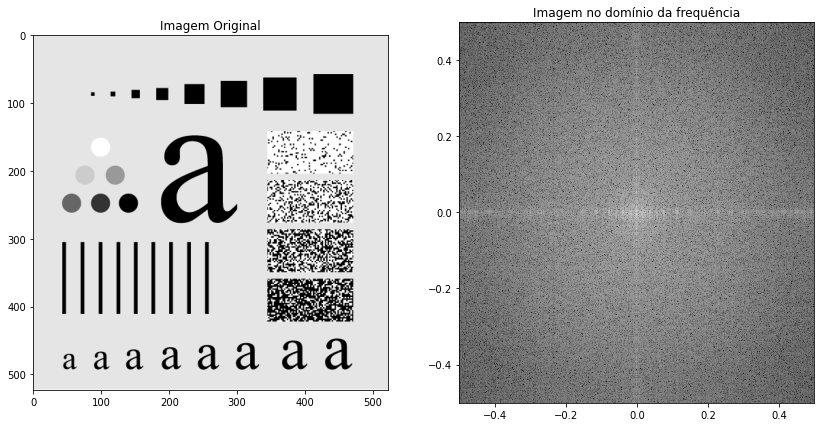

In [3]:
# Leitura da Imagem
img = plt.imread('test_image.tiff')
num_rows, num_cols = img.shape

# Criando imagem aumentada para evitar interferência 
# com as diversas cópias (virtuais) da imagem
img_padded = np.pad(img, ((0, num_rows), (0, num_cols)), 
                    mode='symmetric')

# Cálculo da Transformada de Fourier e das frequências da imagem
Fimg = fft2(img_padded)
freq_r, freq_c = generate_frequencies(2*num_rows, 2*num_cols)
Fimg = fftshift(Fimg)

plt.figure(figsize=[14,7])
plt.subplot(1, 2, 1)
plt.imshow(img, 'gray')
plt.title("Imagem Original")
plt.subplot(1, 2, 2)
plt.pcolormesh(freq_c, freq_r, np.log(np.abs(Fimg)+1), cmap='gray', shading='auto')
plt.title("Imagem no domínio da frequência")

Text(0.5, 1.0, 'Imagem no domínio da frequência com filtro aplicado')

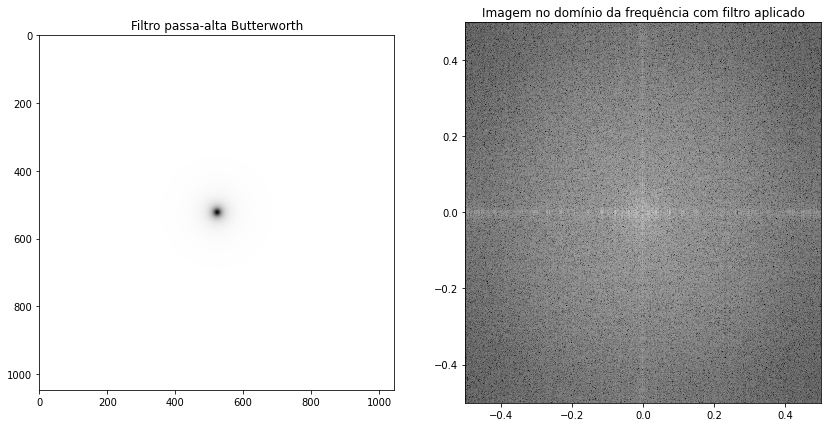

In [4]:
# Calculando o filtro
lp_filter = filtro_passa_alta_butterworth(img_padded, d0=0.01, n=1)

# Aplicando o filtro na frequencia
Fimg_filtered = lp_filter*Fimg

plt.figure(figsize=[14,7])
plt.subplot(1, 2, 1)
plt.imshow(lp_filter, 'gray')
plt.title("Filtro passa-alta Butterworth")
plt.subplot(1, 2, 2)
plt.pcolormesh(freq_c, freq_r, np.log(np.abs(Fimg_filtered)+1), cmap='gray', shading='auto')
plt.title("Imagem no domínio da frequência com filtro aplicado")

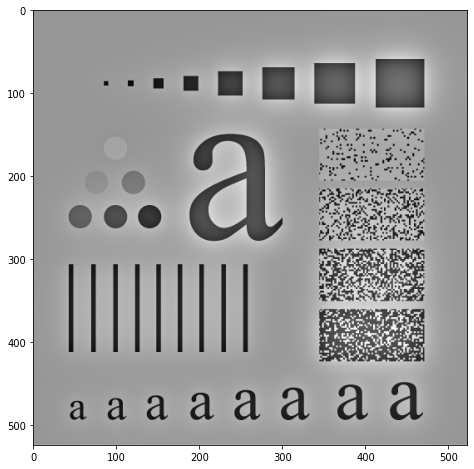

In [5]:
# Recuperando a imagem no domínio espacial usando a transformada inversa
Fimg_filtered = fftshift(Fimg_filtered)
img_filtered = np.real(ifft2(Fimg_filtered))
img_filtered = img_filtered[:num_rows, :num_cols]

plt.figure(figsize=[8,8])
plt.imshow(img_filtered, 'gray')